In [60]:
# Dependencies
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [23]:
# Twitter Credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [24]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [25]:
# Twitter API Keys
consumer_key = consumer_key
consumer_secret = consumer_secret
access_token = access_token
access_token_secret = access_token_secret

In [79]:

#Get tweets from each news organization's twitter feeds.#Get tw 



# A list to hold sentiments.

sentiments = []

target_users = ("@BBC", "@CBS", "@CNN", "@FoxNews", "@NYTimes")

#Loop though target users.

for user in target_users:
    
    #Counter 

    counter = 0
    
    #Loop through 5 pages of tweets for each news organization.


    #Get all tweets from the homefeed of each news organization.

    public_tweets = api.user_timeline(user, count = 100)

        #Loop through all tweets.

    for tweet in public_tweets:

        #Run the Vader analysis on each tweet.

        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        tweet_text = tweet["text"]

        #Add sentiments for each tweet to the sentiments list.

        sentiments.append({"User" : user,
                           "Date": tweet["created_at"],
                           "Compound" : compound,
                           "Positive" : pos,
                           "Negative" : neg,
                           "Neutral" : neu,
                           "Tweets Ago" : counter,
                           "Tweet Text" : tweet_text})
        #Add to counter.

        counter = counter + 1

# # Target User Accounts
# target_user = ("@BBCNews", "@CBSNews", "@CNN", "@FoxNews", "@nytimes")

# # List for dictionaries of results
# results_list = []

# # Loop through each user
# for user in target_user:

#     # Variables for holding sentiments
#     # and tweets
#     compound_list = []
#     positive_list = []
#     negative_list = []
#     neutral_list = []

#     tweet_list = []
#     time_list = []
#     # Loop through 10 pages of tweets (total 200 tweets)
#     counter = 1
#     for x in range(1, 6):
    
#         # Get all tweets from home feed
#         public_tweets = api.user_timeline(user, page=x)

#         # Loop through all tweets
#         for tweet in public_tweets:

#             # Utilize JSON dumps to generate a pretty-printed json
#             print(json.dumps(tweet, sort_keys=True, indent=4))
            
#             # Run Vader Analysis on each tweet
#             results = analyzer.polarity_scores(tweet["text"])
#             compound = results["compound"]
#             pos = results["pos"]
#             neu = results["neu"]
#             neg = results["neg"]

            
            
#             # Add each value to the appropriate list
#             compound_list.append(compound)
#             positive_list.append(pos)
#             negative_list.append(neg)
#             neutral_list.append(neu)
#             tweet_list.append(tweet["text"])
#             time_list.append(tweet["created_at"])
            
#             counter = counter + 1
#     # Create a dictionaty of results
#     user_results = {
#         "Username": user,
#         "Tweets": tweet_list,
#         "Time": time_list,
#         "Compound Score": compound_list,
#         "Postive Score": positive_list,
#         "Neutral Score": neutral_list,
#         "Negative Score": negative_list
#     }
#     results_list.append(user_results)

In [80]:
news_sentiments = pd.DataFrame.from_dict(sentiments)
news_sentiments

# # Create DataFrame from Results List
# results_df = pd.DataFrame(results_list).set_index("Username").round()
# results_df

,Compound,Date,Negative,Neutral,Positive,Tweet Text,Tweets Ago,User
0,0.6688,Sat Jul 14 16:23:10 +0000 2018,0.000,0.824,0.176,RT @BBCSport: Angelique Kerber is the #wimbled...,0,@BBC
1,0.2714,Sat Jul 14 16:03:05 +0000 2018,0.147,0.621,0.232,"""We'll definitely keep in touch!"" 👋 *Immediat...",1,@BBC
2,0.0000,Sat Jul 14 13:03:04 +0000 2018,0.000,1.000,0.000,A wild banana that may hold the key to protect...,2,@BBC
3,0.0000,Sat Jul 14 12:10:55 +0000 2018,0.000,1.000,0.000,There she goes! 🚢 🌊\n\nThe RRS Sir David Atten...,3,@BBC
4,0.0000,Sat Jul 14 12:08:51 +0000 2018,0.000,1.000,0.000,RT @bbctennis: Meghan Markle has arrived!\n\nT...,4,@BBC
5,0.0000,Sat Jul 14 12:04:02 +0000 2018,0.000,1.000,0.000,We all know a hipster restaurant that's taken ...,5,@BBC
6,0.0000,Sat Jul 14 11:13:46 +0000 2018,0.000,1.000,0.000,RT @1Xtra: Tonight 9pm @Drake x @CharlieSloth ...,6,@BBC
7,0.0000,Sat Jul 14 11:07:03 +0000 2018,0.000,1.000,0.000,Sue Barker presents live coverage of Angelique...,7,@BBC
8,-0.2732,Sat Jul 14 10:03:02 +0000 2018,0.130,0.870,0.000,😲The man with world's longest fingernails has ...,8,@BBC
9,0.1027,Sat Jul 14 09:54:33 +0000 2018,0.000,0.924,0.076,RT @CBeebiesHQ: Look WHO is in for tonight's #...,9,@BBC


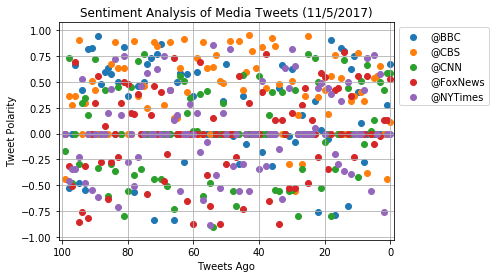

In [81]:
#Plot scatterplot graph.

# Set the x limit,
plt.xlim(101, -1)

#plot scatterplot using a for loop.
for user in target_users:
    dataframe = news_sentiments.loc[news_sentiments["User"] == user]
    plt.scatter(dataframe["Tweets Ago"],dataframe["Compound"],label = user)
    
#Add legend
plt.legend(bbox_to_anchor = (1,1))

#Add title, x axis label, and y axis label.
plt.title("Sentiment Analysis of Media Tweets (11/5/2017)")
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")

#Set a grid on the plot.
plt.grid()

plt.savefig("Sentiment Analysis of Media Tweets")
plt.show()

In [82]:
average_sentiment = news_sentiments.groupby("User")["Compound"].mean()
average_sentiment

User
@BBC        0.155725
@CBS        0.333588
@CNN        0.013129
@FoxNews    0.000911
@NYTimes    0.027466
Name: Compound, dtype: float64